In [ ]:
## Instalar pacotes
!pip install google-play-scraper

In [ ]:
!pip install wordcloud

In [ ]:
spacy.cli.download("pt_core_news_sm")

In [ ]:
!pip install unidecode

In [9]:
## Importar pacotes
from google_play_scraper import app, Sort, reviews
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
#spacy.cli.download("pt_core_news_sm") #executar se não tiver o pacote baixado
nlp = spacy.load('pt_core_news_sm')
from spacy.lang.pt.stop_words import STOP_WORDS
import re, string
from string import punctuation
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# 4º modelo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier


In [10]:
app_id = 'br.gov.meugovbr'
app_data = app(app_id, lang='pt-BR', country='br')

print(app_data)

{'title': 'gov.br', 'description': 'Agora sim! Estamos de cara nova! E com novidades!  \r\nO app "gov.br" (antes Meu gov.br) está renovado para que você tenha uma experiência mais simplificada: \r\n\r\n- Para começar, você pode acessar o app sem fazer o reconhecimento facial e se precisar criar sua conta gov.br, já faremos pelo app.  \r\n- Você pode acessar qualquer serviço do governo que tenha o botão “Entrar com gov.br” sem precisar de senha, usando apenas a biometria do seu celular. Vai que você esquece a senha?!   \r\n- E mais, além de poder consultar seus dados e documentos digitais, poderá compartilhá-los com seus contatos para facilitar a vida. Também pode ver seu histórico de login em sites gov.br e ter mais transparência para entender como estão usando seus dados.  \r\n- E para deixar sua conta mais segura, pode aumentar o nível dela para prata ou ouro!   \r\n\r\nTudo isso disponível no novo app, mantendo o que já era útil: prova de vida digital, recebimento de notificações pa

In [11]:
result, continuation_token = reviews(app_id, lang='pt-BR', country='br', sort='Sort.NFWEST', count=7000)
result, _ = reviews(app_id, continuation_token=continuation_token)
#print(result)

In [12]:
print(result[0])

{'reviewId': 'ed3fccfa-c830-4d19-a446-c6531de8f7d8', 'userName': 'aparecido silva', 'userImage': 'https://play-lh.googleusercontent.com/a/AEdFTp5mvO501fCrHzmKG50xVxNTP2jkk1WFTpfJoCOW=mo', 'content': 'Corrijam os bugs que não permitem entrar de jeito nenhum. Por meio do banco fala que está desatualizado sendo que não está , reconhecimento facial não funciona, não aceita a senha correta. Contratem desenvolvedores que saibam programar.', 'score': 1, 'thumbsUpCount': 1, 'reviewCreatedVersion': '3.2.24', 'at': datetime.datetime(2022, 4, 2, 21, 20, 57), 'replyContent': None, 'repliedAt': None}


In [13]:
df = pd.DataFrame(result)
df.head(5)
#df.to_csv('reviews_data.csv', index=False)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,ed3fccfa-c830-4d19-a446-c6531de8f7d8,aparecido silva,https://play-lh.googleusercontent.com/a/AEdFTp...,Corrijam os bugs que não permitem entrar de je...,1,1,3.2.24,2022-04-02 21:20:57,None,NaT
1,c7ef211f-98a5-48dd-9e25-d759ec6c6074,Giovanna Alves de Oliveira,https://play-lh.googleusercontent.com/a-/AD5-W...,Consegui resolver o problema de acesso que eu ...,5,63,3.0.0,2021-10-15 17:58:52,None,NaT
2,29a03dce-c134-48f6-b591-4725280b74bc,Jhonatas Silva,https://play-lh.googleusercontent.com/a-/AD5-W...,Estou tentando aumentar o nível de segurança d...,1,0,3.2.21,2022-02-15 16:22:06,None,NaT
3,aa96f934-1ab6-46f6-bdb3-d45be92dd733,Edielson Assis,https://play-lh.googleusercontent.com/a-/AD5-W...,"Simplesmente, App ridículo. Essa é a forma que...",1,59,2.1.9,2021-04-03 13:43:00,"Prezado Edielson, temos realizados testes diár...",2021-04-06 18:52:11
4,fd3ad675-88e9-4a86-94af-7a78d2b1f9b3,andre luiz,https://play-lh.googleusercontent.com/a-/AD5-W...,no qrcout ficou mais fácil,4,0,3.2.39,2022-11-22 13:33:34,Obrigado por compartilhar sua experiência. Nos...,2022-11-25 18:31:05


In [14]:
df_reviews = df[['reviewId', 'content', 'score']].rename(columns={'content': 'review', 'score': 'star'})
df_reviews
#df.drop(["userName", "userName", "userImage", "thumbsUpCount", "at", "repliedAt"], inplace=True)


,reviewId,review,star
0,ed3fccfa-c830-4d19-a446-c6531de8f7d8,Corrijam os bugs que não permitem entrar de je...,1
1,c7ef211f-98a5-48dd-9e25-d759ec6c6074,Consegui resolver o problema de acesso que eu ...,5
2,29a03dce-c134-48f6-b591-4725280b74bc,Estou tentando aumentar o nível de segurança d...,1
3,aa96f934-1ab6-46f6-bdb3-d45be92dd733,"Simplesmente, App ridículo. Essa é a forma que...",1
4,fd3ad675-88e9-4a86-94af-7a78d2b1f9b3,no qrcout ficou mais fácil,4
...,...,...,...
6995,b2796935-2ee8-4ccd-929d-4056e75db139,muito bom o aplicativo,5
6996,2878bdcb-d9d6-4871-b3d9-c27673461617,muito bom o aplicativo,5
6997,80942bc5-8355-4dc5-8c72-354242741458,é muito pratico,5
6998,91c014c4-81a7-4c00-bc04-cefa95353c43,ótimo e prático,5


In [15]:
# Criando uma nova coluna "sentiment" com base nos valores de "star"
df_reviews["sentiment"] = np.where((df_reviews["star"] >= 4), 1, 0)
df_reviews

,reviewId,review,star,sentiment
0,ed3fccfa-c830-4d19-a446-c6531de8f7d8,Corrijam os bugs que não permitem entrar de je...,1,0
1,c7ef211f-98a5-48dd-9e25-d759ec6c6074,Consegui resolver o problema de acesso que eu ...,5,1
2,29a03dce-c134-48f6-b591-4725280b74bc,Estou tentando aumentar o nível de segurança d...,1,0
3,aa96f934-1ab6-46f6-bdb3-d45be92dd733,"Simplesmente, App ridículo. Essa é a forma que...",1,0
4,fd3ad675-88e9-4a86-94af-7a78d2b1f9b3,no qrcout ficou mais fácil,4,1
...,...,...,...,...
6995,b2796935-2ee8-4ccd-929d-4056e75db139,muito bom o aplicativo,5,1
6996,2878bdcb-d9d6-4871-b3d9-c27673461617,muito bom o aplicativo,5,1
6997,80942bc5-8355-4dc5-8c72-354242741458,é muito pratico,5,1
6998,91c014c4-81a7-4c00-bc04-cefa95353c43,ótimo e prático,5,1


In [16]:
df_reviews.describe()

,star,sentiment
count,7000.000000,7000.000000
mean,1.686143,0.138857
std,1.326285,0.345822
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,5.000000,1.000000


In [17]:
# exibe a correlação entre cada par de colunas numéricas no DataFrame.
df_reviews.corr()

,star,sentiment
star,1.000000,0.923966
sentiment,0.923966,1.000000


In [18]:
# exibe a covariancia entre cada
df_reviews.cov()

,star,sentiment
star,1.759031,0.423785
sentiment,0.423785,0.119593


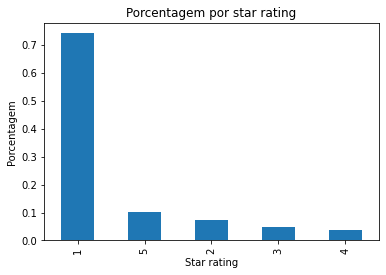

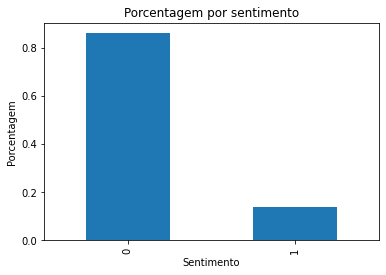

In [19]:
# computando as frequencias de cada valor das colunas
star_counts = df_reviews['star'].value_counts(normalize=True)
sentiment_counts = df_reviews['sentiment'].value_counts(normalize=True)

# plotando o gráfico de barras
star_counts.plot.bar(title='Porcentagem por star rating')
plt.xlabel('Star rating')
plt.ylabel('Porcentagem')
plt.show()

sentiment_counts.plot.bar(title='Porcentagem por sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Porcentagem')
plt.show()

In [20]:
rows_count_s1 = df_reviews[df_reviews['sentiment'] == 1].count()
print(rows_count_s1.review)

972


In [21]:
rows_count_s0 = df_reviews[df_reviews['sentiment'] == 0].count()
print(rows_count_s0.review)

6028


In [22]:
# Calculando total de "sentiment" = 0, que é maioria, a ser excluído para EQUILIBRAR o dataframe!
print(rows_count_s0.sentiment)
print(rows_count_s1.sentiment)
qt_del = rows_count_s0.sentiment - rows_count_s1.sentiment
print('qt_del =', qt_del)

6028
972
qt_del = 5056


In [23]:
# Selecionando as linhas com "sentiment" igual a 1
to_drop = df_reviews[df_reviews['sentiment'] == 0].head(qt_del)
#to_drop
# Removendo as linhas selecionadas
df_reviews = df_reviews.drop(to_drop.index)
df_reviews

,reviewId,review,star,sentiment
1,c7ef211f-98a5-48dd-9e25-d759ec6c6074,Consegui resolver o problema de acesso que eu ...,5,1
4,fd3ad675-88e9-4a86-94af-7a78d2b1f9b3,no qrcout ficou mais fácil,4,1
5,2ccee486-12b8-4e0e-8ea7-0ba7520d21e0,Não consigo acessar. Alguém está usando meu ac...,5,1
8,365c5cd1-c984-44e0-aea8-c9121983d5f0,"Prático, mais de dificuldade mediana no uso.",4,1
25,a4510a07-870a-4298-af35-9a09ad7ad61b,acho prático e rápido,5,1
...,...,...,...,...
6995,b2796935-2ee8-4ccd-929d-4056e75db139,muito bom o aplicativo,5,1
6996,2878bdcb-d9d6-4871-b3d9-c27673461617,muito bom o aplicativo,5,1
6997,80942bc5-8355-4dc5-8c72-354242741458,é muito pratico,5,1
6998,91c014c4-81a7-4c00-bc04-cefa95353c43,ótimo e prático,5,1


In [24]:
rows_count = df_reviews[df_reviews['sentiment'] == 0].count()
print(rows_count.review)

972


In [25]:
rows_count = df_reviews[df_reviews['sentiment'] == 1].count()
print(rows_count.review)

972


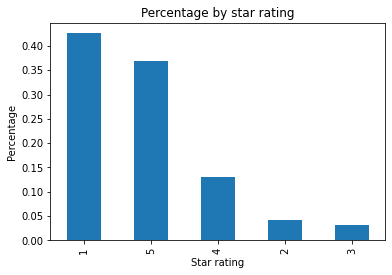

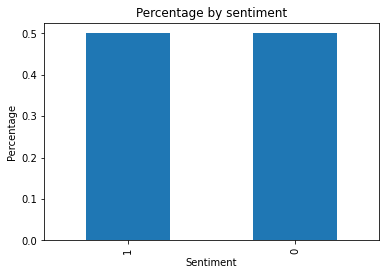

In [26]:
# computando as frequencias de cada valor das colunas
star_counts = df_reviews['star'].value_counts(normalize=True)
sentiment_counts = df_reviews['sentiment'].value_counts(normalize=True)

# plotando o gráfico de barras
star_counts.plot.bar(title='Percentage by star rating')
plt.xlabel('Star rating')
plt.ylabel('Percentage')
plt.show()

sentiment_counts.plot.bar(title='Percentage by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

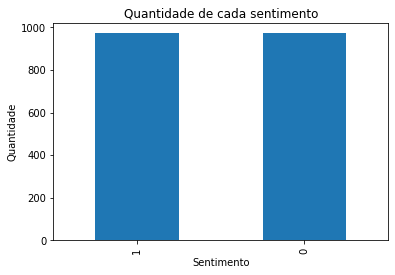

In [27]:
series = df_reviews['sentiment'].value_counts()
ax = series.plot(kind='bar', title='Quantidade de cada sentimento')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Quantidade')
plt.show()

In [28]:
## Retirando as stopwords para exibir melhor o gráfico de nuvem

# Baixando as stopwords da língua portuguesa
nltk.download('stopwords')
nltk.download('punkt')

# Define a lista de stopwords
stop_words = set(stopwords.words('portuguese'))

# Adiciona stopwords personalizadas
#stop_words.update(['produto','é'])

# Cria uma nova coluna "reviews_cleaned"
df_reviews['reviews_cleaned'] = ''

# Itera sobre cada linha do DataFrame
for index, row in df_reviews.iterrows():
    # Tokeniza a review
    words = word_tokenize(row['review'])

    # Remove as stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Junta as palavras de volta em uma string
    review_cleaned = ' '.join(words)

    # Atualiza a coluna "reviews_cleaned"
    df_reviews.at[index, 'reviews_cleaned'] = review_cleaned

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
#df_reviews = df_reviews.drop("review_cleaned", axis=1)
df_reviews.head(3)

,reviewId,review,star,sentiment,reviews_cleaned
1,c7ef211f-98a5-48dd-9e25-d759ec6c6074,Consegui resolver o problema de acesso que eu ...,5,1,Consegui resolver problema acesso app CNH Digi...
4,fd3ad675-88e9-4a86-94af-7a78d2b1f9b3,no qrcout ficou mais fácil,4,1,qrcout ficou fácil
5,2ccee486-12b8-4e0e-8ea7-0ba7520d21e0,Não consigo acessar. Alguém está usando meu ac...,5,1,consigo acessar . Alguém usando acesso . abri ...


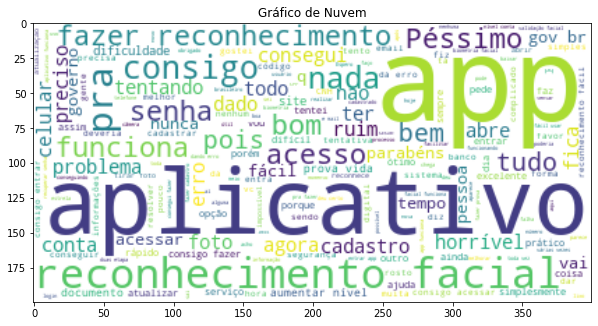

In [30]:
# Juntando as reviews em uma string
reviews = " ".join(review for review in df_reviews['reviews_cleaned'])

# Gerando a nuvem de palavras
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(reviews)

# Exibindo o gráfico
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Gráfico de Nuvem')
plt.show()

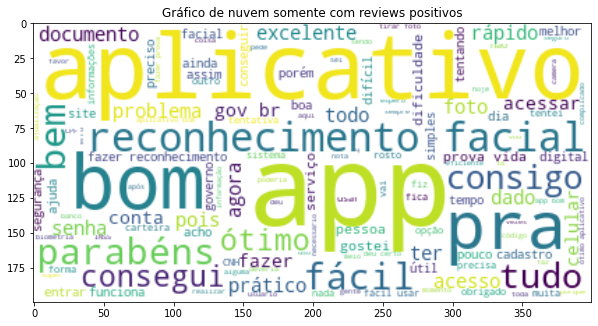

In [31]:
# Juntando as reviews em uma string
reviewsPositivas = ' '.join(review for review in df_reviews['reviews_cleaned'][df_reviews['sentiment'] == 1])

# Gerando a nuvem de palavras
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(reviewsPositivas)

# Exibindo o gráfico
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Gráfico de nuvem somente com reviews positivos')
plt.show()

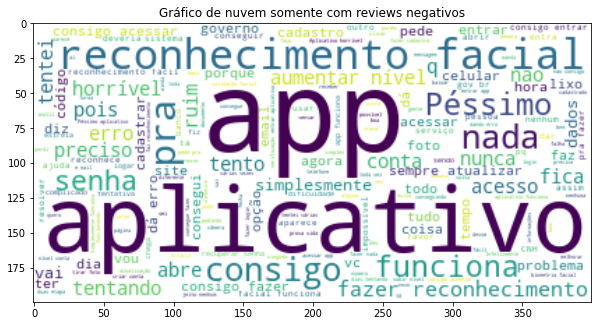

In [32]:
# Juntando as reviews em uma string
reviewsNegativos = ' '.join(review for review in df_reviews['reviews_cleaned'][df_reviews['sentiment'] == 0])

# Gerando a nuvem de palavras
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(reviewsNegativos)

# Exibindo o gráfico
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.title('Gráfico de nuvem somente com reviews negativos')
plt.show()

# Modelo 1:

In [33]:
## Modelo de Regressão Logística SEM stop words

# Utilize o CountVectorizer para criar uma matriz de recursos de contagem de palavras
# vetoriza o texto e cria variáveis de entrada e saída
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_reviews['reviews_cleaned'])
y = df_reviews['sentiment']
# divisão de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
# treina o modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)
#avalia as métricas de desempenho do modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
f1 = f1_score(y_test, y_pred)
print ("F1: " , f1)


Accuracy:  0.8200514138817481
F1:  0.8349056603773584


# Modelo 2:

In [34]:
#cria rotina de pré-processamento
def preprocess(text):
    # Excluindo citações com @:
    text = re.sub('@[^\s]+', '', text)
    # Excluindo acentuação das palavras:
    text = unidecode(text)
    # Excluindo html tags, como <strong></strong>:
    text = re.sub('<[^<]+?>','', text)
    # Excluindo os números:
    text = ''.join(c for c in text if not c.isdigit())
    # Excluindo URL's:
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    # Excluindo pontuação:
    text = ''.join(c for c in text if c not in punctuation)
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [35]:
#cria coluna com texto tratado
df_reviews['text_tratdo'] = df_reviews['review'].apply(preprocess)

#vetoriza o texto e cria variáveis de entrada e saída
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_reviews['text_tratdo'])
y = df_reviews['sentiment']

# divisão de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# treina o modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)

#avalia as métricas de desempenho do modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
f1 = f1_score(y_test, y_pred)
print ("F1: " , f1)

Accuracy:  0.794344473007712
F1:  0.8104265402843601


# Modelo 3

In [36]:
#preprocessamento que mantém stop words
def preprocess_stop(text):
    # Excluindo citações com @:
    text = re.sub('@[^\s]+', '', text)
    # Excluindo acentuação das palavras:
    text = unidecode(text)
    # Excluindo html tags, como <strong></strong>:
    text = re.sub('<[^<]+?>','', text)
    # Excluindo os números:
    text = ''.join(c for c in text if not c.isdigit())
    # Excluindo URL's:
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    # Excluindo pontuação:
    text = ''.join(c for c in text if c not in punctuation)
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [37]:
#cria coluna com texto tratado
df_reviews['text_tratdo_stop'] = df_reviews['review'].apply(preprocess_stop)

#vetoriza o texto e cria variáveis de entrada e saída
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_reviews['text_tratdo_stop'])
y = df_reviews['sentiment']

# divisão de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# treina o modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)

#avalia as métricas de desempenho do modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
f1 = f1_score(y_test, y_pred)
print ("F1: " , f1)

Accuracy:  0.8174807197943444
F1:  0.8305489260143198


# Modelo 4

In [38]:
df_reviews.head(5)

,reviewId,review,star,sentiment,reviews_cleaned,text_tratdo,text_tratdo_stop
1,c7ef211f-98a5-48dd-9e25-d759ec6c6074,Consegui resolver o problema de acesso que eu ...,5,1,Consegui resolver problema acesso app CNH Digi...,Consegui resolver problema acesso ter app CNH ...,Consegui resolver o problema de acesso que eu ...
4,fd3ad675-88e9-4a86-94af-7a78d2b1f9b3,no qrcout ficou mais fácil,4,1,qrcout ficou fácil,qrcout ficar facil,em o qrcout ficar mais facil
5,2ccee486-12b8-4e0e-8ea7-0ba7520d21e0,Não consigo acessar. Alguém está usando meu ac...,5,1,consigo acessar . Alguém usando acesso . abri ...,Nao consigo acessar Alguem usar acesso Ja abri...,Nao consigo acessar Alguem este usar meu acess...
8,365c5cd1-c984-44e0-aea8-c9121983d5f0,"Prático, mais de dificuldade mediana no uso.",4,1,"Prático , dificuldade mediana uso .",Pratico dificuldade mediano uso,Pratico mais de dificuldade mediano em o uso
25,a4510a07-870a-4298-af35-9a09ad7ad61b,acho prático e rápido,5,1,acho prático rápido,achar pratico rapir,achar pratico e rapir


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_reviews['reviews_cleaned'], df_reviews['sentiment'], test_size=0.2, random_state=42)

# Pré-processamento dos dados
# Utilizando o TfidfVectorizer para criar uma representação numérica dos dados de texto
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Treinando o modelo de Gradient Boosting
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Fazendo previsões
y_pred = clf.predict(X_test)

# Calculando o F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

F1 score:  0.8135593220338982
